In [1]:
import os
import json
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [2]:
targetDir = '/home/alejandro/throwawayfiles/jolteon-results'
os.chdir(targetDir)
files = sorted([ f for f in os.listdir() if f.endswith('.stats.json') ])
files

['avrora_10_c-dynamicarray.stats.json',
 'avrora_10_c-linklist.stats.json',
 'avrora_10_java.stats.json',
 'avrora_1_c-dynamicarray.stats.json',
 'avrora_1_c-linklist.stats.json',
 'avrora_1_java.stats.json',
 'avrora_2_c-dynamicarray.stats.json',
 'avrora_2_c-linklist.stats.json',
 'avrora_2_java.stats.json',
 'avrora_3_c-dynamicarray.stats.json',
 'avrora_3_c-linklist.stats.json',
 'avrora_3_java.stats.json',
 'avrora_4_c-dynamicarray.stats.json',
 'avrora_4_c-linklist.stats.json',
 'avrora_4_java.stats.json',
 'avrora_5_c-dynamicarray.stats.json',
 'avrora_5_c-linklist.stats.json',
 'avrora_5_java.stats.json',
 'avrora_6_c-dynamicarray.stats.json',
 'avrora_6_c-linklist.stats.json',
 'avrora_6_java.stats.json',
 'avrora_7_c-dynamicarray.stats.json',
 'avrora_7_c-linklist.stats.json',
 'avrora_7_java.stats.json',
 'avrora_8_c-dynamicarray.stats.json',
 'avrora_8_c-linklist.stats.json',
 'avrora_8_java.stats.json',
 'avrora_9_c-dynamicarray.stats.json',
 'avrora_9_c-linklist.stats.jso

In [3]:
data = []
for fname in files:
    with open(fname) as f:
        parts = fname.split('.')[0].split('_')
        benchmark = parts[0]; iteration = int(parts[1]); montype = parts[2]
        
        d = json.loads(f.read())['metadata']
        d['benchmark'] = benchmark; d['iter'] = iteration; d['type'] = montype
        data.append(d)
    
data

[{'lifetime': 29674,
  'numSamples': 714848,
  'samplingRate': 0,
  'benchmark': 'avrora',
  'iter': 10,
  'type': 'c-dynamicarray'},
 {'lifetime': 31192,
  'numSamples': 753412,
  'samplingRate': 0,
  'benchmark': 'avrora',
  'iter': 10,
  'type': 'c-linklist'},
 {'lifetime': 28264,
  'numSamples': 1323342,
  'samplingRate': 0,
  'benchmark': 'avrora',
  'iter': 10,
  'type': 'java'},
 {'lifetime': 30246,
  'numSamples': 735294,
  'samplingRate': 0,
  'benchmark': 'avrora',
  'iter': 1,
  'type': 'c-dynamicarray'},
 {'lifetime': 31433,
  'numSamples': 773018,
  'samplingRate': 0,
  'benchmark': 'avrora',
  'iter': 1,
  'type': 'c-linklist'},
 {'lifetime': 24970,
  'numSamples': 1191032,
  'samplingRate': 0,
  'benchmark': 'avrora',
  'iter': 1,
  'type': 'java'},
 {'lifetime': 29811,
  'numSamples': 719366,
  'samplingRate': 0,
  'benchmark': 'avrora',
  'iter': 2,
  'type': 'c-dynamicarray'},
 {'lifetime': 31004,
  'numSamples': 759782,
  'samplingRate': 0,
  'benchmark': 'avrora',
 

In [4]:
x = {}
for d in data:
    bench = d['benchmark']
    del d['benchmark']
    if not bench in x.keys(): x[bench] = [d]
    else: x[bench].append(d)
data = x
data

{'avrora': [{'lifetime': 29674,
   'numSamples': 714848,
   'samplingRate': 0,
   'iter': 10,
   'type': 'c-dynamicarray'},
  {'lifetime': 31192,
   'numSamples': 753412,
   'samplingRate': 0,
   'iter': 10,
   'type': 'c-linklist'},
  {'lifetime': 28264,
   'numSamples': 1323342,
   'samplingRate': 0,
   'iter': 10,
   'type': 'java'},
  {'lifetime': 30246,
   'numSamples': 735294,
   'samplingRate': 0,
   'iter': 1,
   'type': 'c-dynamicarray'},
  {'lifetime': 31433,
   'numSamples': 773018,
   'samplingRate': 0,
   'iter': 1,
   'type': 'c-linklist'},
  {'lifetime': 24970,
   'numSamples': 1191032,
   'samplingRate': 0,
   'iter': 1,
   'type': 'java'},
  {'lifetime': 29811,
   'numSamples': 719366,
   'samplingRate': 0,
   'iter': 2,
   'type': 'c-dynamicarray'},
  {'lifetime': 31004,
   'numSamples': 759782,
   'samplingRate': 0,
   'iter': 2,
   'type': 'c-linklist'},
  {'lifetime': 23360,
   'numSamples': 1034183,
   'samplingRate': 0,
   'iter': 2,
   'type': 'java'},
  {'lifet

In [5]:
#benchmarks = list(set([ f.split('_')[0] for f in files]))
#benchmarks

In [6]:
res = {}
for benchmark in data:
    for t in ['java','c-linklist','c-dynamicarray']:
        av_samples = statistics.mean( [ d['numSamples'] for d in data[benchmark] if d['type'] == t] )
        av_lifetime = statistics.mean( [ d['lifetime'] for d in data[benchmark] if d['type'] == t] )
        
        if not benchmark in res.keys(): res[benchmark] = dict()
        if not t in res[benchmark].keys(): res[benchmark][t] = dict()
        
        res[benchmark][t]['avg_samples'] = av_samples
        res[benchmark][t]['avg_lifetime'] = av_lifetime

res

{'avrora': {'java': {'avg_samples': 1158841.7, 'avg_lifetime': 27223.5},
  'c-linklist': {'avg_samples': 742644, 'avg_lifetime': 30443.3},
  'c-dynamicarray': {'avg_samples': 744138, 'avg_lifetime': 30543.7}},
 'batik': {'java': {'avg_samples': 760679.6, 'avg_lifetime': 13529.2},
  'c-linklist': {'avg_samples': 355010, 'avg_lifetime': 13133.5},
  'c-dynamicarray': {'avg_samples': 349773.2, 'avg_lifetime': 12782.4}},
 'biojava': {'java': {'avg_samples': 1445251.8, 'avg_lifetime': 25973},
  'c-linklist': {'avg_samples': 620530.8, 'avg_lifetime': 23807.5},
  'c-dynamicarray': {'avg_samples': 690463, 'avg_lifetime': 26581.1}},
 'cassandra': {'java': {'avg_samples': 225516.3, 'avg_lifetime': 5096},
  'c-linklist': {'avg_samples': 125618.8, 'avg_lifetime': 5116.1},
  'c-dynamicarray': {'avg_samples': 127630.4, 'avg_lifetime': 5151.2}},
 'eclipse': {'java': {'avg_samples': 1252401, 'avg_lifetime': 24433.6},
  'c-linklist': {'avg_samples': 666442.4, 'avg_lifetime': 25304},
  'c-dynamicarray': 

<ipython-input-7-a22483eb441a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (axs) = plt.subplots(1,2 ,figsize=(10,5) )


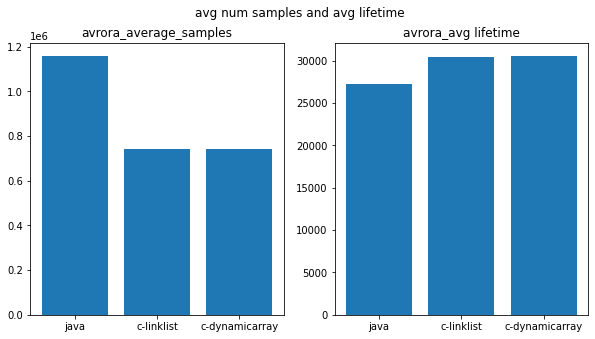

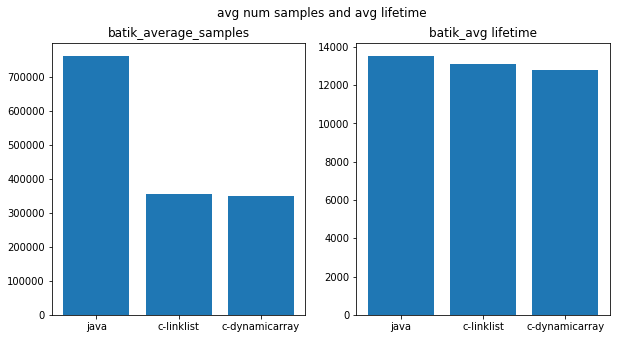

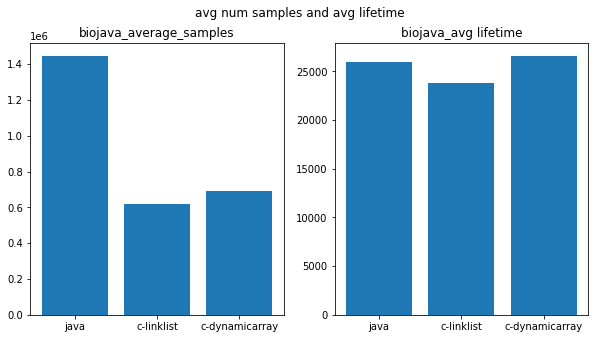

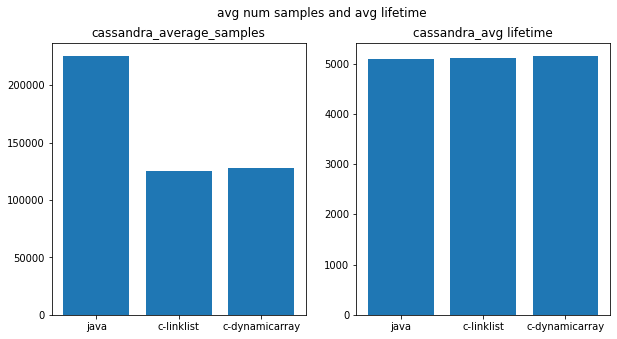

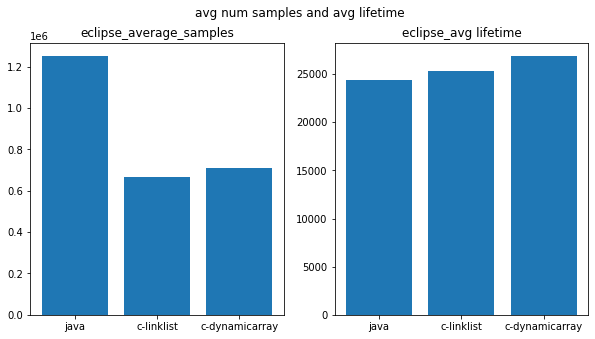

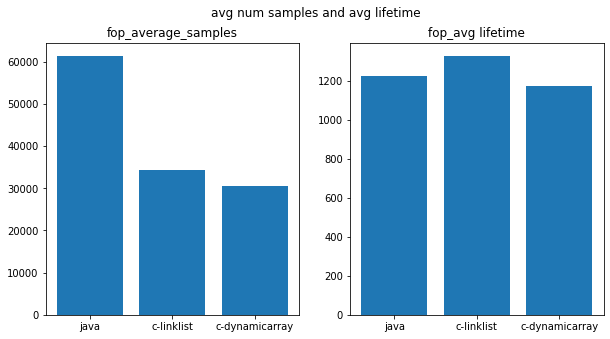

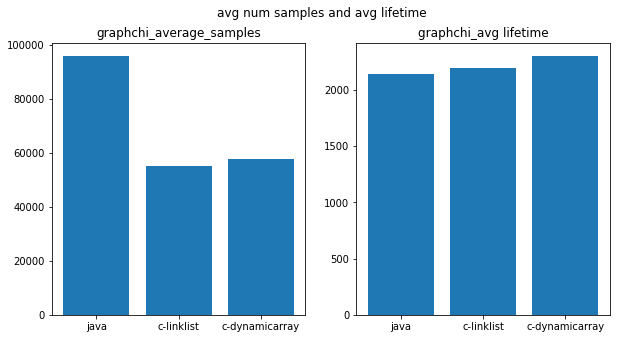

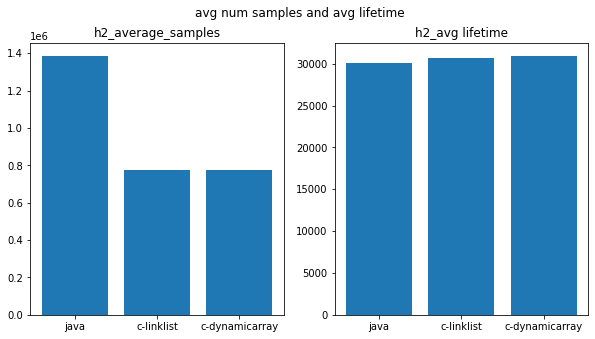

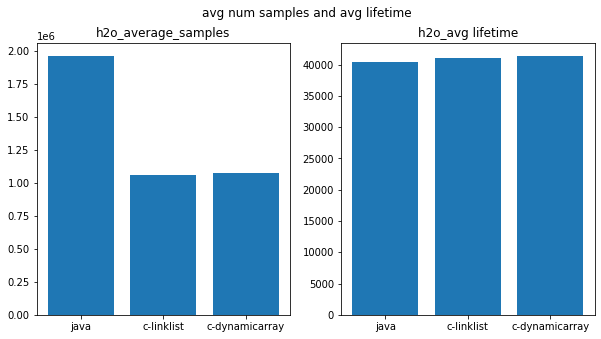

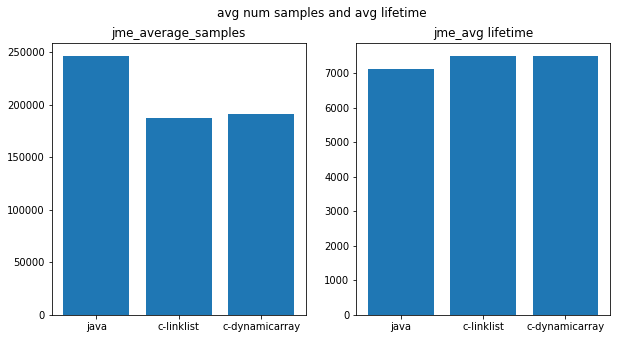

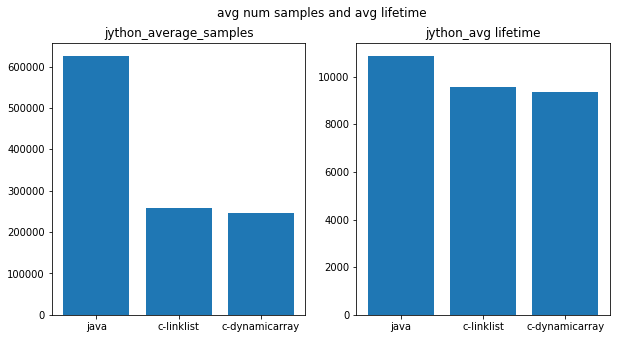

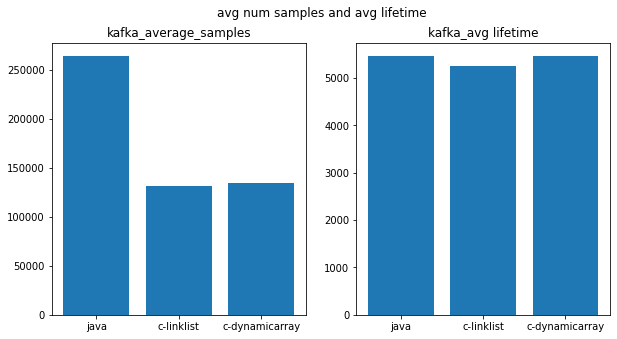

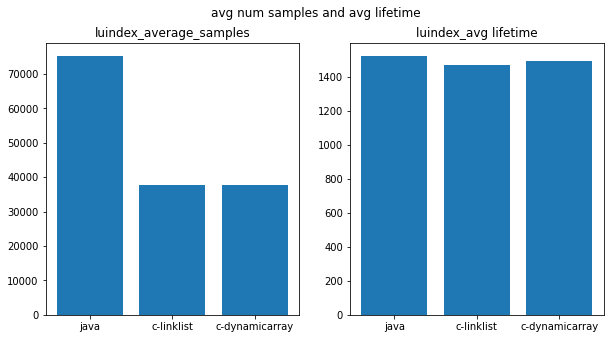

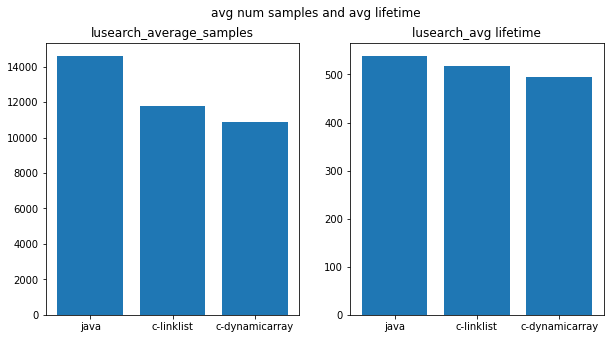

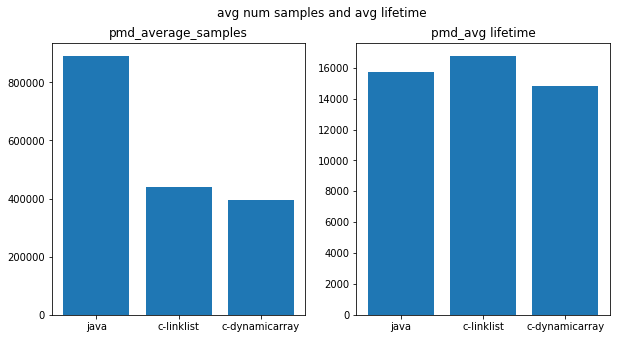

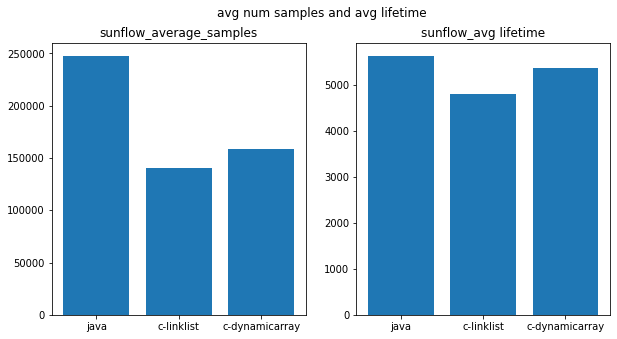

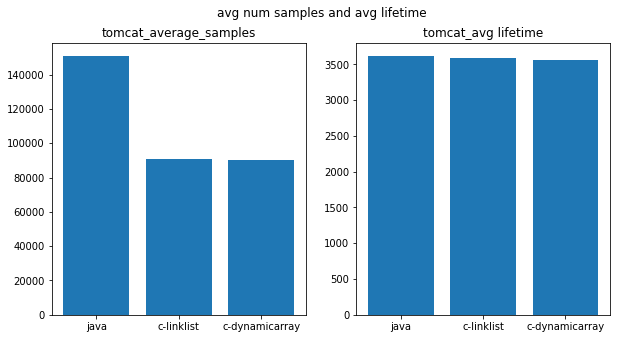

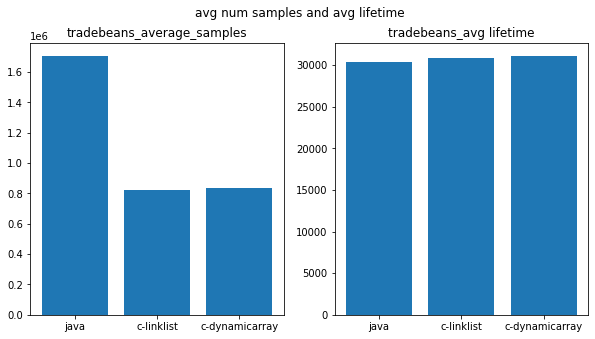

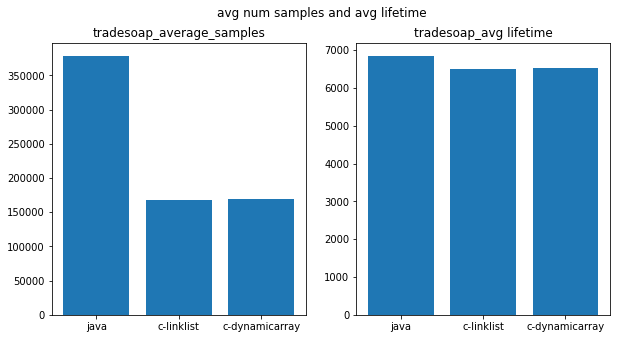

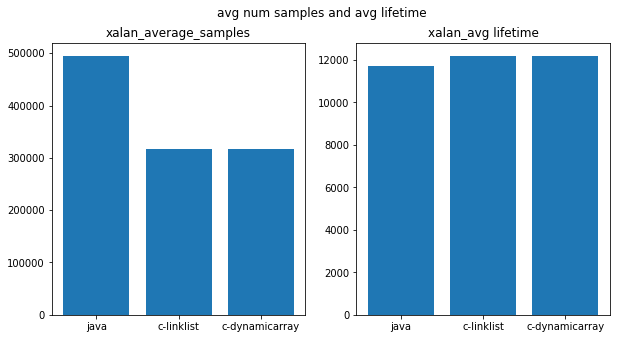

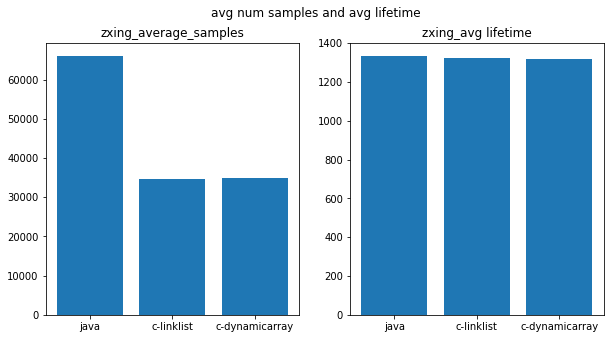

In [7]:
for bench in res:
    data = res[bench]
    #fig = plt.figure()
    fig, (axs) = plt.subplots(1,2 ,figsize=(10,5) )
    fig.suptitle('avg num samples and avg lifetime')
    
    ax = axs.flat[0]
    montypes = list(data.keys())
    num_samples_list = [ data[t]['avg_samples'] for t in data ]
    title = bench+"_average_samples"
    ax.set_title(title)
    ax.bar(montypes,num_samples_list)
    
    ax = axs.flat[1]
    montypes = list(data.keys())
    lifetime_list = [ data[t]['avg_lifetime'] for t in data ]
    ax.bar(montypes,lifetime_list)
    ax.set_title(bench+"_avg lifetime")

    plt.savefig(bench+"_numsamples")